In [1]:
import cuml
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap



X, y = make_blobs(n_samples= 5000, centers=3, n_features=2, random_state=0, cluster_std = 0.5)
X_train, X_test, y_train, y_test = train_test_split(X,y)

/home/jose-nation/anaconda3/envs/EnvPruebas/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [ ]:
X_train.dtype,y_train.dtype,type(y_train)

(dtype('float64'), dtype('int64'), numpy.ndarray)

## **Plot the data**

In [ ]:
def plot_decision_boundary(model, X, y, forest = False):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100), np.linspace(y_min,y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in).reshape(xx.shape)

  if len(np.unique(y)) >= 3:
    print("Multiclass classification")
  else:
    print("Binary Classification")



   # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.viridis, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
def plotTrainTestModel(model, X_train, y_train, X_test, y_test):
  # Plot the decision boundaries for the training and test sets
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.title("Train")
  plot_decision_boundary(model, X=X_train, y=y_train)
  plt.subplot(1, 2, 2)
  plt.title("Test")
  plot_decision_boundary(model, X=X_test, y=y_test)
  plt.show()

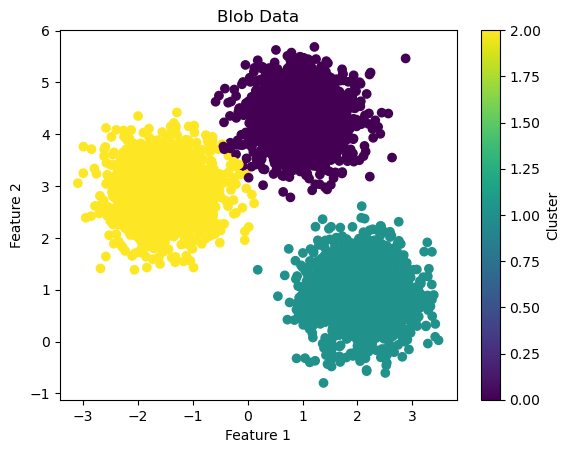

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Blob Data')
plt.colorbar(label='Cluster')
plt.show()

# **Modelos de Cuml**

## **Logistic Regression**

In [ ]:
estLog = cuml.LogisticRegression()

estLog.fit(X_train, y_train)

MemoryError: std::bad_alloc: CUDA error at: /home/jose-nation/anaconda3/envs/EnvPruebas/include/rmm/mr/device/cuda_memory_resource.hpp

In [ ]:
estLin = cuml.LinearRegression()

estLin.fit(X_train, y_train)

/home/jose-nation/anaconda3/envs/EnvPruebas/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


LinearRegression()

In [ ]:
estLog.intercept_, estLin.intercept_

(array([-9.55009748,  5.96325868,  3.58683879]), 2.2678309238081016)

Multiclass classification
Multiclass classification


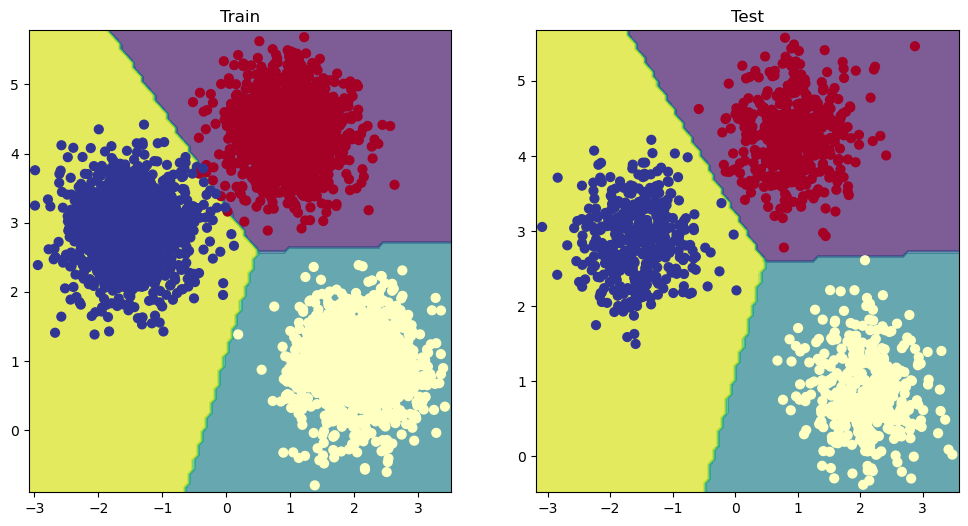

In [ ]:
plotTrainTestModel(estLog, X_train, y_train, X_test, y_test)

## **Support Vector Machine**

Multiclass classification
Multiclass classification


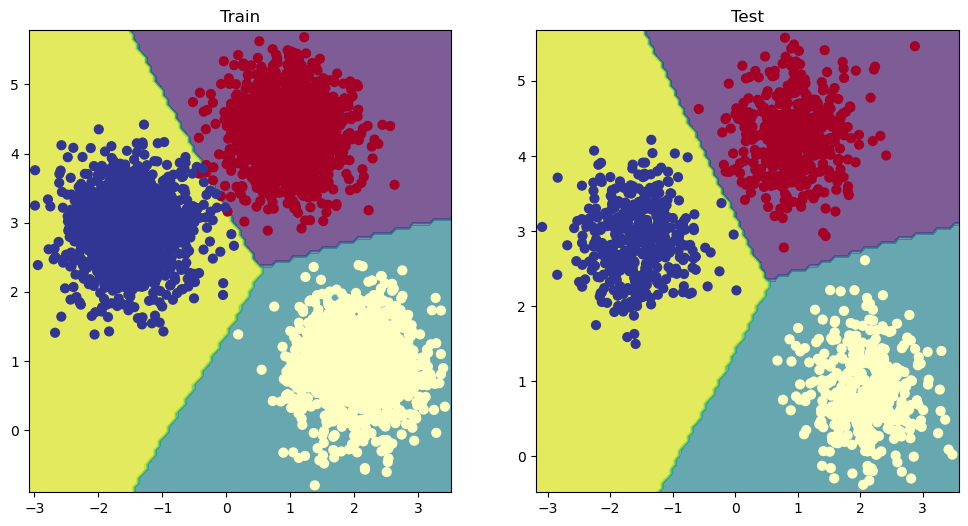

In [ ]:
estSVM = cuml.SVC()
estSVM.fit(X_train,y_train)
plotTrainTestModel(estSVM, X_train, y_train, X_test, y_test)


## **Random Forest**

/home/jose-nation/anaconda3/envs/EnvPruebas/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Multiclass classification
Multiclass classification


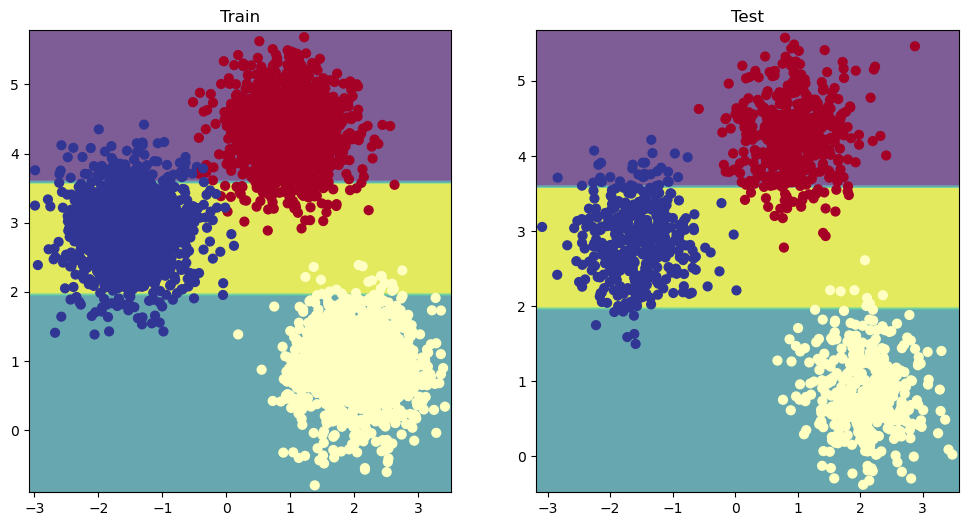

In [ ]:
estRF = cuml.RandomForestClassifier()
estRF.fit(X_train,y_train)
plotTrainTestModel(estRF, X_train, y_train, X_test, y_test)

## **K nearest neigborgs**

In [ ]:
estKN = cuml.KNeighborsClassifier()
estKN.fit(X_train,y_train)
# plotTrainTestModel(estKN, X_train, y_train, X_test, y_test)

KNeighborsClassifier()

In [ ]:
y_pred = estKN.predict(X_train)

cuml.metrics.accuracy.accuracy_score(y_train,y_pred)



0.9991999864578247

In [ ]:
y_pred

array([2, 0, 1, ..., 0, 1, 0])

In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("dataTrain/digen10_8322.csv",index_col="X")


x_train = dataset.iloc[:, :-1].to_numpy().astype(np.float32)
y_train = dataset['target'].to_numpy().astype(np.float32)


In [ ]:
x_train[:5], y_train[:5]

(array([[ 0.2441653 ,  0.67167753, -0.9812721 , -0.10583168,  0.5055847 ,
          0.28471762,  1.7693883 ,  0.8509684 , -0.44633153,  0.66731   ],
        [-0.3385512 , -1.6486437 , -0.78360236, -0.20614451, -0.7825834 ,
         -0.2176316 , -1.642264  ,  0.5125777 ,  1.8414121 , -1.6365119 ],
        [-0.10179678,  0.5638284 ,  0.9334525 , -0.16342525, -1.2880837 ,
         -3.1333117 ,  0.90135455, -0.02476623, -0.6631021 , -0.81094867],
        [ 1.3959388 , -0.7992136 ,  0.6938205 ,  0.45083186,  0.8636864 ,
         -1.4175106 ,  0.2426587 ,  0.47456968, -0.5276708 , -0.5814829 ],
        [-0.36817822,  0.07968218, -0.9791886 ,  0.03882419,  0.34066963,
         -0.8467199 ,  1.565344  , -0.8023102 ,  1.2327287 ,  0.9039963 ]],
       dtype=float32),
 array([1., 0., 1., 1., 0.], dtype=float32))

In [2]:
from m5gp import m5gpClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

est = m5gpClassifier(
            generations=2, # number of generations (limited by default)
            Individuals=16, # number of individuals
            GenesIndividuals=256, # number of genes per individual
            mutationProb=0.1, # mutation rate probability
            mutationDeleteRateProb=0.01,  # mutation delete rate probality
            sizeTournament=0.15, # size of tournament
            evaluationMethod=3,  #error evaluation method 
            maxRandomConstant=999, #number of constants (-maxRandomConstant to maxRandomConstant)
            genOperatorProb=0.50, #probablity for generate Operators 
            genVariableProb=0.39, #probablity for generate variables 
            genConstantProb=0.1, #probablity for generate constants
            genNoopProb=0.01, #probablity for generate NOOP Operators 
			useOpIF=0, #Set if use IF operator
			verbose=1, #Show menssages on execution
            crossVal=True,
            k=5,
            scorer=0,
            averageMode="weighted",
            epochs = 2000
            )

X, y = make_blobs(n_samples= 5000, centers=3, n_features=2, random_state=0, cluster_std = 0.5)

# Assuming X_train and y_train are your training data
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state = 0 )

est.fit(X_train, y_train)

Mini Batch Classifier
Initializing m5gp
Device #0: NVIDIA GeForce RTX 2060
 Compute Capability: 7.5
 Total Memory: 11 GB
Succesfully initialized PYCUDA
Initial memory info:
GPU Memory:  (10640556032, 12603490304)
Free Memory:  10640556032
Finishing up PYCUDA
Executing Fit - Method( 4 ) -  Mini Batch Classifier  Scorer: 0
nRows: 3750 nVars: 2
Blocksize: 16 Gridsize:  1
0.6471215486526489
0.6247334480285645
0.6481876373291016


KeyboardInterrupt: 

In [5]:
est.score(X_test,y_test,metric=3,averageMode="micro")

Inicio predict:  (1250, 2)


0.9999974430679099